In [11]:
import pandas as pd
import geopandas as gpd
import shapely

import plotly.express as px
import plotly.graph_objects as go

gdf_goldline = gpd.read_file('534group2/shapefiles/804_Gold_Track_0316')

df_2018 = pd.read_csv('534group2/ACS data/tractdata.csv')

gdf_tracts_2010_2018 = gpd.read_file('534group2/shapefiles/tl_2017_06_tract')

gdf_stations = gpd.read_file('804_Gold_Stations_0316')


In [2]:
#Create mask for Phase 1 stations and station-adjacent tracts

phase1_tracts = ['06037206020', '06037206031', '06037207103', '06037206010', '06037207102', '06037206020', '06037199000', '06037199000', '06037185202', '06037185310', '06037199400', '06037185100', '06037183610', '06037183620', '06037183701', '06037183810', '06037183520', '06037480600', '06037480703', '06037464000', '06037463602', '06037463700', '06037461902', '06037462302', '06037462202', '06037462201', '06037462301', '06037462700', '06037463000', '06037463102', '06037462900']
df_2018 = df_2018[df_2018['GEOID11'].isin(phase1_tracts)]
gdf_tracts_2010_2018 = gdf_tracts_2010_2018[gdf_tracts_2010_2018['GEOID'].isin(phase1_tracts)]

phase1_stations = ['80409', '80410', '80411', '80412', '80413', '80414', '80415', '80416', '80417', '80418', '80419', '80420', '80421']
gdf_stations = gdf_stations[gdf_stations['STOPNUM'].isin(phase1_stations)]

In [3]:
#Align CRS
#gdf_stations is based on a non-universal coordinate system and must be aligned before use

gdf_goldline = gdf_goldline.to_crs(gdf_tracts_2010_2018.crs)
gdf_stations = gdf_stations.to_crs(gdf_tracts_2010_2018.crs)

In [6]:
gdf_goldline.head()

,Id,geometry
0,0,"LINESTRING (-118.15307 34.03340, -118.15401 34..."
1,0,"LINESTRING (-118.19613 34.03766, -118.19869 34..."
2,0,"LINESTRING (-118.21924 34.04731, -118.22050 34..."
3,0,"LINESTRING (-117.88991 34.13704, -117.89010 34..."
4,0,"LINESTRING (-118.19613 34.03766, -118.19594 34..."


(-118.26335559100039, -117.87211658899147, 34.00735885000001, 34.16915015)

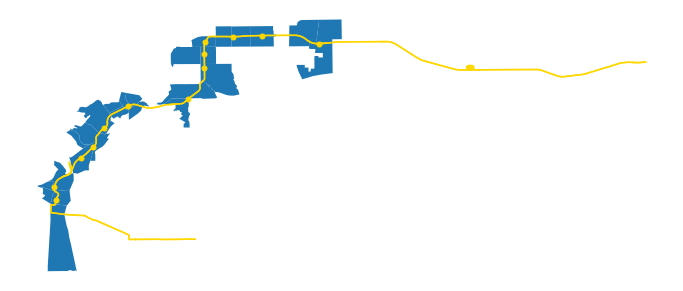

In [4]:
ax = gdf_goldline.plot(color='gold',figsize=(12,6))
ax = gdf_tracts_2010_2018.plot(ax=ax)
ax = gdf_stations.plot(ax=ax,c='gold',markersize=25)
ax.axis('off')

In [8]:
gdf_tracts_2010_2018.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.00230 37.52984, -122.00224 37.5..."
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21963 34.02629, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."


NameError: name 'gdf_2018_all' is not defined